In [1]:
import pandas as pd
# Read UFO sightings data
data = pd.read_csv("../data/complete.csv", on_bad_lines='skip')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
df=data[data["country"]=="us"].sort_index(level="datetime")
df = df.dropna(subset=['datetime'])
df = df.sort_values(by='datetime').reset_index(drop=True)
df=df.dropna()

# Read military bases data
military_bases = pd.read_csv("../data/military-bases.csv", on_bad_lines='skip')
military_bases = military_bases.dropna()

# Display military bases data
print("\nMilitary Bases Data:")
military_bases

C:\Users\anton\AppData\Local\Temp\ipykernel_111696\1580756030.py:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/complete.csv", on_bad_lines='skip')



Military Bases Data:


,,,,,,,,,,,,,,,,,,,,,Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area
31.230999,"-85.6506347178;""{""""coordinates"""": [[[-85.65462565497243",31.234178331412515],[-85.65280405303592,31.2350202819558],[-85.65101108759404,31.233844887000856],[-85.64624105229998,31.231687174187147],[-85.6461603431633,31.227908115185613],[-85.64979400602967,31.22793346599952],[-85.65055293422273,31.22819845388161],[-85.65114885861591,31.228358922650713],[-85.65448605767558,31.229254906742018],[-85.65462565497243,31.234178331412515]]],"""""type"""": """"Polygon""""}"";26;65;Army Active;All..."
29.884619,"-98.2193812601;""{""""coordinates"""": [[[-98.21405296403519",29.881741788407666],[-98.22093997631431,29.87525638900559],[-98.22688073381588,29.880714298886854],[-98.22376613997854,29.8839619002862],[-98.22267722644564,29.891689856087375],[-98.2140001260285,29.89308936826227],[-98.21404370420125,29.889994012243857],[-98.21404924231497,29.889815498432725],[-98.21409100050096,29.884640003341854],[-98.21405296403519,29.881741788407666]]],"""""type"""": """"Polygon""""}"";423;2954;AF Active;Ca..."
13.310684,"144.736799463;""{""""coordinates"""": [[[144.74050133252663",13.310010427767008],[144.7405013603744,13.30973491498884],[144.7405016460386,13.307058682780797],[144.73679989806027,13.307058286770022],[144.733098159065,13.307057834810683],[144.73309767307646,13.31068323745712],[144.7330971772064,13.314308639156133],[144.73679902579607,13.314309070121853],[144.74050088336895,13.314309446014882],[144.74050133252663,13.310010427767008]]],"""""type"""": """"Polygon""""}"";664;5610;Navy Active;..."
38.760289,"-104.301342147;""{""""coordinates"""": [[[-104.3037858883342",38.781215702234775],[-104.30348866455277,38.76687622422326],[-104.29908696906791,38.76691106643378],[-104.29858255156117,38.75036433784128],[-104.30319186477617,38.75033028410978],[-104.30369826396647,38.76687460696151],[-104.30399642558903,38.78121306359585],[-104.30428333940594,38.795705506983],[-104.30407363488939,38.79570815838814],[-104.3037858883342,38.781215702234775]]],"""""type"""": """"Polygon""""}"";295;2498;AF Active;US..."
39.823370,"-89.6708742707;""{""""coordinates"""": [[[-89.66858233781238",39.83064753161304],[-89.66842497722912,39.81974738310147],[-89.66839715370982,39.81781897541764],[-89.6683724500395,39.81610674313765],[-89.67313007690454,39.81606001154887],[-89.67313228586183,39.81620299588274],[-89.6733774864085,39.827663902287256],[-89.67339565124186,39.83025113394826],[-89.67221159174736,39.83068336257657],[-89.66858233781238,39.83064753161304]]],"""""type"""": """"Polygon""""}"";494;3731;Army Guard;N..."


## Heatmap of military bases

In [2]:
# Print the column names to see what we're working with
print("Columns in military_bases DataFrame:")
print(military_bases.columns)

# Also let's look at the first few rows to understand the data structure
print("\nFirst few rows of military_bases:")
print(military_bases.head())

Columns in military_bases DataFrame:
Index(['Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area'], dtype='object')

First few rows of military_bases:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area
31.230999 -85.6506347178;"{""coordinates"": [[[-85.654625... 31.234178331412515] [-85.65280405303592  31.2350202819558]  [-85.65101108759404  31.233844887000856] [-85.64624105229

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's first look at what we're working with
print("First row of coordinates:")
print(military_bases['Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area'].iloc[0])

# Let's try to extract just the first part before the semicolon
coordinates = military_bases['Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area'].str.split(';').str[0]

# Print the first few coordinates to see the format
print("\nFirst few coordinates:")
print(coordinates.head())

First row of coordinates:
 ""type"": ""Polygon""}";26;65;Army Active;Allen Stagefield AL;N/A;Alabama;United States;Active;1.64138338;0.17657484;3170.6333159366786;627423.9946918904

First few coordinates:
31.230999  -85.6506347178;"{""coordinates"": [[[-85.65462565497243  31.234178331412515]  [-85.65280405303592   31.2350202819558]   [-85.65101108759404   31.233844887000856]  [-85.64624105229998   31.231687174187147]  [-85.6461603431633    31.227908115185613]  [-85.64979400602967   31.22793346599952]  [-85.65055293422273   31.22819845388161]   [-85.65114885861591   31.228358922650713]  [-85.65448605767558   31.229254906742018]  [-85.65462565497243  31.234178331412515]]]     ""type"": ""Polygon""}"
29.884619  -98.2193812601;"{""coordinates"": [[[-98.21405296403519  29.881741788407666]  [-98.22093997631431   29.87525638900559]  [-98.22688073381588   29.880714298886854]  [-98.22376613997854   29.8839619002862]    [-98.22267722644564   29.891689856087375]  [-98.2140001260285    29.89308936

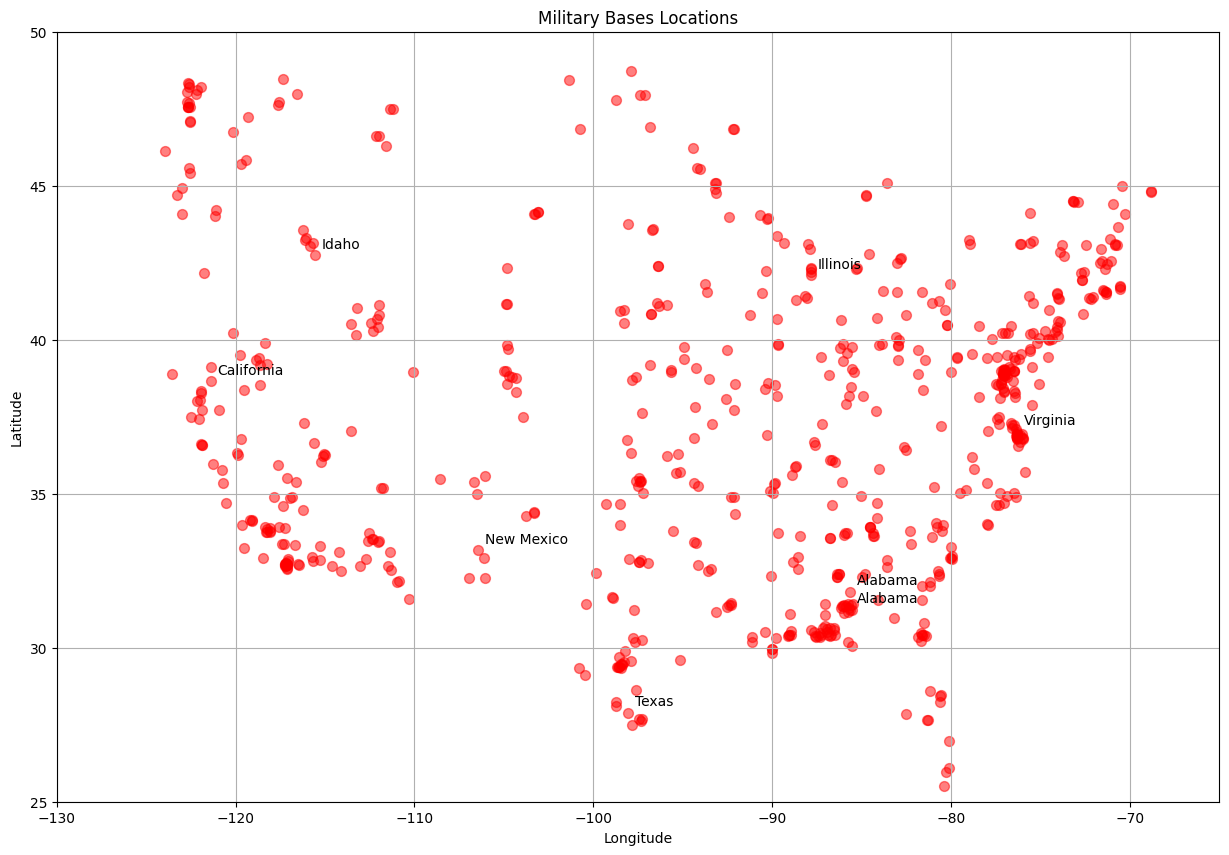

Number of military bases: 776

Coordinate ranges:
Latitude range: 13.3106836826 to 71.3217290437
Longitude range: -161.767465275 to 174.107140074


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the military bases data
military_bases = pd.read_csv("../data/military-bases.csv", sep=';', on_bad_lines='skip')

# Split the Geo Point column into latitude and longitude
military_bases[['latitude', 'longitude']] = military_bases['Geo Point'].str.split(',', expand=True).astype(float)

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(military_bases['longitude'], military_bases['latitude'], 
           alpha=0.5, c='red', s=50)
plt.title('Military Bases Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Set axis limits for US
plt.xlim(-130, -65)
plt.ylim(25, 50)

# Add state labels for some major bases
for idx, row in military_bases.head(10).iterrows():
    plt.annotate(row['State Terr'], 
                (row['longitude'], row['latitude']),
                xytext=(5, 5), textcoords='offset points')

plt.show()

# Print some statistics
print("Number of military bases:", len(military_bases))
print("\nCoordinate ranges:")
print("Latitude range:", military_bases['latitude'].min(), "to", military_bases['latitude'].max())
print("Longitude range:", military_bases['longitude'].min(), "to", military_bases['longitude'].max())

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the military bases data
military_bases = pd.read_csv("../data/military-bases.csv", sep=';', on_bad_lines='skip')

# Split the Geo Point column into latitude and longitude
military_bases[['latitude', 'longitude']] = military_bases['Geo Point'].str.split(',', expand=True).astype(float)

# Create a cleaner DataFrame with just the essential columns
clean_military_bases = military_bases[['Site Name', 'COMPONENT', 'State Terr', 'COUNTRY', 'Oper Stat', 'latitude', 'longitude']]

# Rename columns to be more readable
clean_military_bases = clean_military_bases.rename(columns={
    'Site Name': 'site_name',
    'COMPONENT': 'component',
    'State Terr': 'state',
    'COUNTRY': 'country',
    'Oper Stat': 'operational_status'
})

# Save to a new CSV file
clean_military_bases.to_csv('../data/clean_military_bases.csv', index=False)

# Print the first few rows of the clean data
print("Clean military bases data:")
print(clean_military_bases.head())

# Print the shape of the clean data
print("\nShape of clean data:", clean_military_bases.shape)

Clean military bases data:
                      site_name    component       state        country  \
0           Allen Stagefield AL  Army Active     Alabama  United States   
1      Louisville Stagefield AL  Army Active     Alabama  United States   
2  White Sands Missile Range NM  Army Active  New Mexico  United States   
3                   Fort Monroe  Army Active    Virginia  United States   
4                MCB Camp Smith    MC Active      Hawaii  United States   

  operational_status   latitude   longitude  
0             Active  31.230999  -85.650635  
1             Active  31.815733  -85.649798  
2             Active  33.159464 -106.425696  
3           Inactive  37.013020  -76.304376  
4             Active  21.386628 -157.905641  

Shape of clean data: (776, 7)
